# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the Dataset

In [5]:
df = pd.read_csv('Amazon Sale Report.csv', encoding = 'unicode_escape')

#  Data Cleaning

In [6]:
df.shape

(128976, 21)

In [7]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [9]:
df.drop(['New', 'PendingS'], axis = 1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [12]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [14]:
df.dropna(inplace = True)

In [16]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [17]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [18]:
df['ship-postal-code'] =df['ship-postal-code'].astype('int')

In [19]:
df['ship-postal-code'].dtype

dtype('int32')

In [21]:
df.rename(columns ={'Qty' : 'Quantity'})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128875,128874,405-4724097-1016369,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,S,Shipped,1,INR,854.00,ALLUR,ANDHRA PRADESH,524315,IN,False,Easy Ship
128876,128875,403-9524128-9243508,06-01-2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,XL,On the Way,0,INR,734.29,Barabanki,UTTAR PRADESH,225001,IN,False,Easy Ship
128888,128887,405-6493630-8542756,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Trousers,M,Shipped,1,INR,518.00,NOIDA,UTTAR PRADESH,201301,IN,False,Easy Ship
128891,128890,407-0116398-1810752,05-31-22,Cancelled,Merchant,Amazon.in,Standard,Wallet,Free,On the Way,0,INR,398.10,MADURAI,TAMIL NADU,625007,IN,False,Easy Ship


In [22]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,37514.000000,37514.000000,37514.000000,37514.000000
mean,60953.809858,0.867383,646.553960,463291.552754
std,36844.853039,0.354160,279.952414,194550.425637
min,0.000000,0.000000,0.000000,110001.000000
25%,27235.250000,1.000000,458.000000,370465.000000
50%,63470.500000,1.000000,629.000000,500019.000000
75%,91790.750000,1.000000,771.000000,600042.000000
max,128891.000000,5.000000,5495.000000,989898.000000


In [23]:
df.describe(include = 'object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,91,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,697,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


# Exploratory Data Analysis

Text(0.5, 1.0, ' SIZE OF CLOTHES')

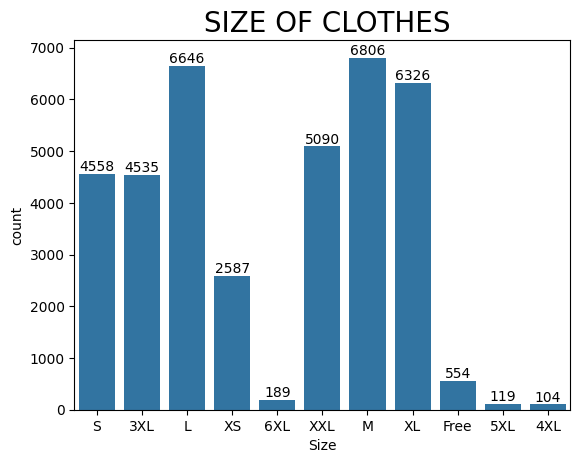

In [54]:
ax = sns.countplot(x= 'Size', data= df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.title( ' SIZE OF CLOTHES', fontsize = 20)  


NOTE: FROM THE ABOVE GRAPH WE CAN CONCLUDED THAT MOST OF THE PEOPLE BUYS M-SIZE


In [29]:
df.groupby(['Size'], as_index = False)['Qty'].sum().sort_values(by= 'Qty', ascending = False)

,Size,Qty
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


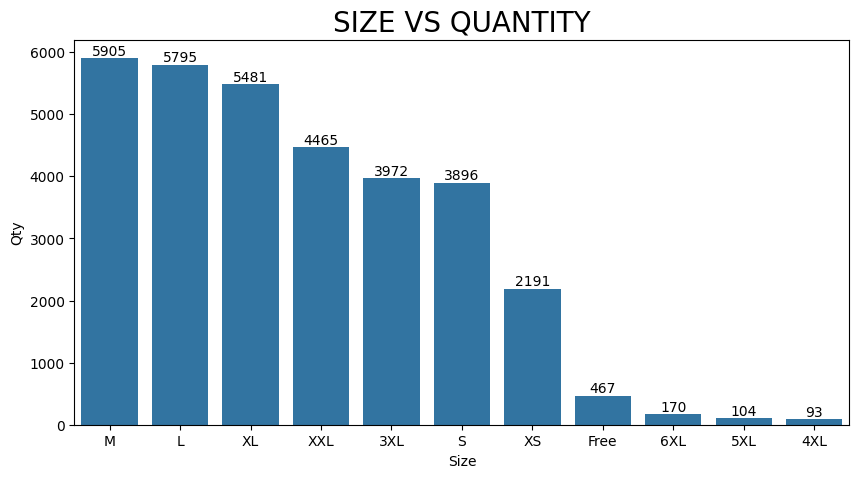

In [55]:
S_qty = df.groupby(['Size'], as_index = False)['Qty'].sum().sort_values(by= 'Qty', ascending = False)
plt.figure(figsize =(10,5))
ax= sns.barplot(x= 'Size', y= 'Qty', data = S_qty)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('SIZE VS QUANTITY', fontsize = 20)
plt.show()


 NOTE: FROM THE ABOVE GRAPH WE CONCLUDED THAT THE MOST OF THE QUANTITY BUYS M-SIZE IN THE SALES
 

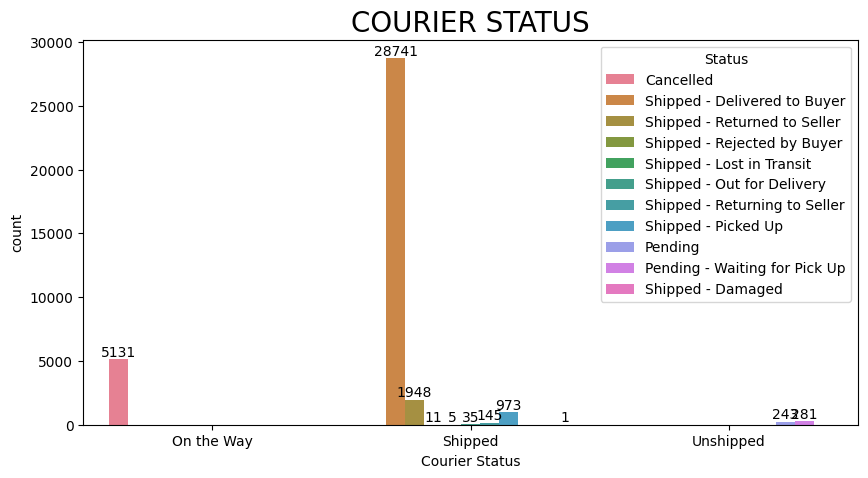

In [56]:
plt.figure(figsize= (10,5))
ax= sns.countplot(data= df, x= 'Courier Status', hue = 'Status')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title ('COURIER STATUS', fontsize = 20)
plt.show()
    


NOTE: FROM THE ABOVE GRAPH THE MAJORITY OF THE ORDERS ARE SHIPPED THROUGH THE COURIER


<Axes: >

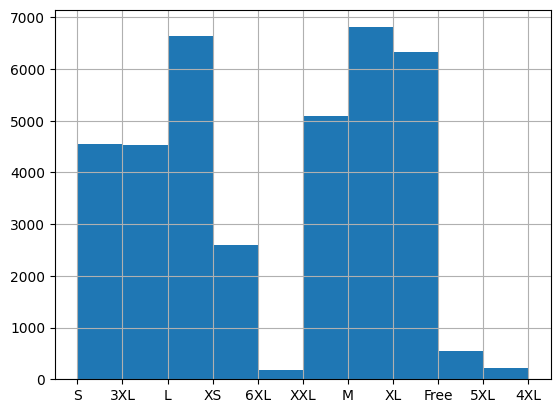

In [47]:
df['Size'].hist()

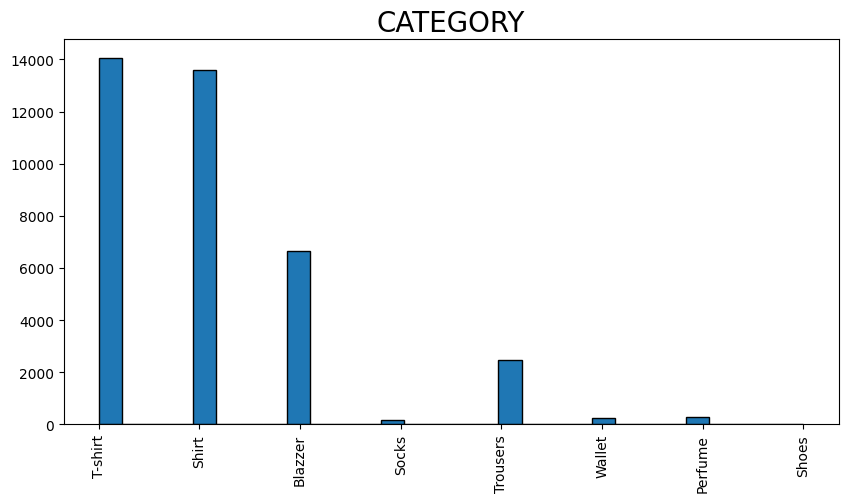

In [57]:
df['Category'] = df['Category'].astype('str')
column_data = df['Category'] 
plt.figure(figsize = (10,5))
plt.hist(column_data, bins = 30, edgecolor = 'Black')
plt.xticks(rotation = 90)
plt.title('CATEGORY', fontsize = 20)
plt.show()


NOTE: FROM ABOVE GRAPH YOU CAN SEE THAT THE MOST OF THE BUYERS ARE T-SHIRT


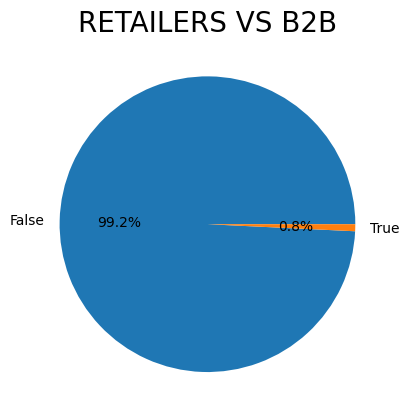

In [62]:
B2B_Check = df['B2B'].value_counts()
plt.pie(B2B_Check, labels=B2B_Check.index, autopct ='%1.1f%%')
plt.title( 'RETAILERS VS B2B' , fontsize = 20)
plt.show()


NOTE: FROM THE ABOVE GRAPH WE CAN CONCLUDED THAT THE MAXIMUM 99,2% BUYERS ARE RETAILERS AND 0.8% ARE B2B BUYERS


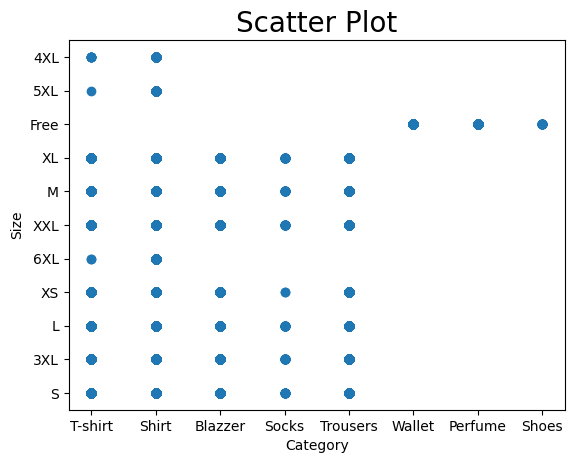

In [64]:
x_data = df['Category']
y_data = df['Size']
plt.scatter(x_data, y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatter Plot', fontsize = 20)
plt.show()

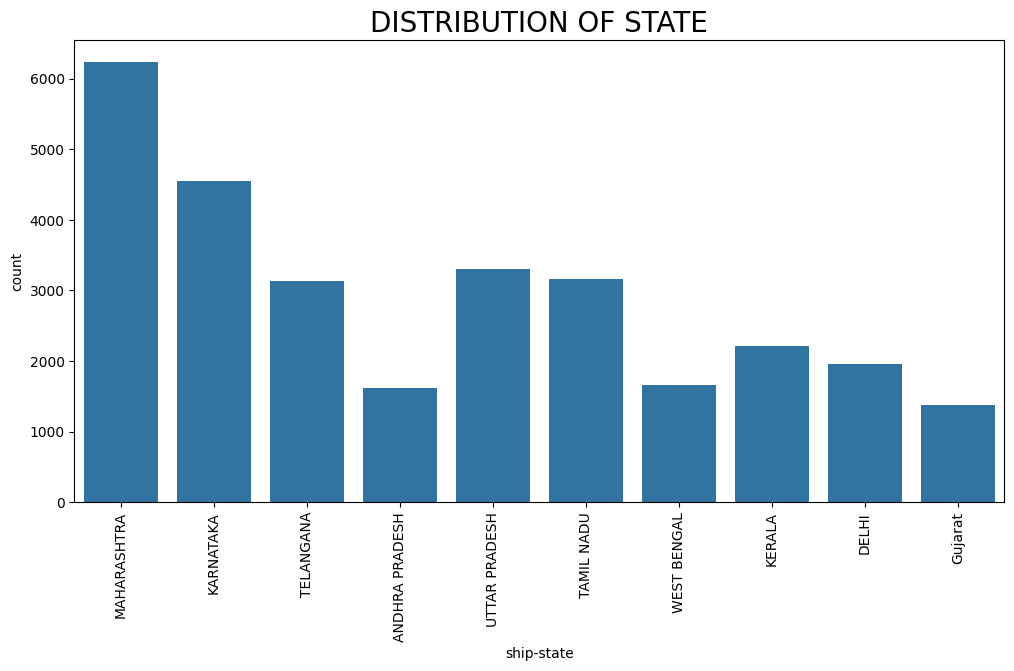

In [68]:
plt.figure(figsize = (12,6))
top_10_state = df['ship-state'].value_counts().head(10)
sns.countplot(data= df[df['ship-state'].isin(top_10_state.index)], x= 'ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('DISTRIBUTION OF STATE', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


NOTE: FROM THE ABOVE GRAPH WE CAN SEE THAT THE MOST OF THE BUYERS ARE THE MAHARASHTRA STATE


# CONCLUSION :


THE DATA ANALYSIS REVEALS THAT THE BUSINESS HAS A SIGNIFICANT CUSTOMER BASE IN MAHARASHTRA STATE, MAINLY SERVES RETAILERS, FULFILLS ORDERS THROUGH      AMAZON, EXPERIENCES HIGH DEMAND FOR T-SHIRTS, AND SEES M-SIZE AS THE PREFERRED CHOICE AMONG BUYERS.
